## Data and seven questions
This week's data comes from the House of Commons library, part of the UK's Parliament. The full research briefing, including charts and graphs, can be read at

https://commonslibrary.parliament.uk/research-briefings/cbp-10009/

They provide two Excel spreadsheets, one describing the winners of the recent elections, split up per electoral district (known as a "constituency"). A similar, companion document, lists the members who were defeated. You can download them from here:

https://researchbriefings.files.parliament.uk/documents/CBP-10009/Winning-members.xlsx
https://researchbriefings.files.parliament.uk/documents/CBP-10009/Defeated-MPs.xlsx

This week's learning goals include joins, groups, pivot tables, plotting, and working with strings.

I'll be back tomorrow with my full solutions and explanations, as well as the Jupyter notebook I used to solve these problems. Meanwhile, here are my six challenges:

- Load the two files into a single data frame, with one row for each constituency, and the index being the ons_id columns from each. Columns from the defeated file should have the _defeated suffix attached to their names.
- Which party won the greatest number of votes in each region? Which party lost the greatest number of seats in each region?
- Produce a pie chart showing how many seats were won by each political party. Use some of the traditional colors (er, colours) for the parties' pie slices: Red for Labour, blue for the Conservatives, and orange for the Liberal Democrats. You should probably choose another few colors just to make the pie chart look a bit more interesting.
- What is the proportion of women in the incoming parliament? In how many races did a female candidate defeat a male candidate, and vice versa?
- The new prime minister is Sir Keir Starmer. How many members of parliament have the title of "Sir" or "Dame", and how many of them are from each party?
- Does a shorter, snappier name help someone to win an election? For races in which a sitting MP was defeated, in how many cases did the newcomer have a shorter name? (To determine which is "shorter," combine the lengths of the first, middle, and last names.)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

winning = pd.read_excel('data/MPs-elected.xlsx', index_col='ons_id')
defeated = pd.read_excel('data/Defeated-MPs.xlsx', index_col='ons_id')
defeated.columns = [f'{x}_defeated' for x in defeated.columns]
print(winning.head())
print('---')
print(defeated.head())

election = pd.merge(winning, defeated, on='ons_id', how='outer')
election

                            constituency_name region_name country_name  \
ons_id                                                                   
W07000081                    Aberafan Maesteg       Wales        Wales   
S14000060                      Aberdeen North    Scotland     Scotland   
S14000061                      Aberdeen South    Scotland     Scotland   
S14000062  Aberdeenshire North and Moray East    Scotland     Scotland   
S14000063                  Airdrie and Shotts    Scotland     Scotland   

          constituency_type             result party_abbreviation  \
ons_id                                                              
W07000081            County           Lab hold                Lab   
S14000060           Borough           SNP hold                SNP   
S14000061           Borough           SNP hold                SNP   
S14000062            County  SNP gain from Con                SNP   
S14000063            County  Lab gain from SNP                Lab  

,constituency_name,region_name,country_name,constituency_type,result,party_abbreviation,party_name,title,firstname,surname,...,party_abbreviation_defeated,party_name_defeated,title_defeated,firstname_defeated,surname_defeated,middlenames_defeated,mnis_id_defeated,gender_defeated,defeated_mp_defeated,former_mp_defeated
ons_id,,,,,,,,,,,,,,,,,,,,,
E14001063,Aldershot,South East,England,Borough,Lab gain from Con,Lab,Labour,NaN,Alex,Baker,...,Con,Conservative,NaN,Leo,Docherty,NaN,4600.0,Male,Yes,Yes
E14001064,Aldridge-Brownhills,West Midlands,England,Borough,Con hold,Con,Conservative,NaN,Wendy,Morton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14001065,Altrincham and Sale West,North West,England,Borough,Lab gain from Con,Lab,Labour,Mr,Connor,Rand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14001066,Amber Valley,East Midlands,England,County,Lab gain from Con,Lab,Labour,NaN,Linsey,Farnsworth,...,Con,Conservative,NaN,Nigel,Mills,John,4136.0,Male,Yes,Yes
E14001067,Arundel and South Downs,South East,England,County,Con hold,Con,Conservative,NaN,Andrew,Griffith,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000108,Swansea West,Wales,Wales,County,Lab hold,Lab,Labour,NaN,Torsten,Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W07000109,Torfaen,Wales,Wales,County,Lab hold,Lab,Labour,NaN,Nick,Thomas-Symonds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W07000110,Vale of Glamorgan,Wales,Wales,County,Lab gain from Con,Lab,Labour,NaN,Kanishka,Narayan,...,Con,Conservative,NaN,Alun,Cairns,Hugh,4086.0,Male,Yes,Yes


In [40]:
election.columns

Index(['constituency_name', 'region_name', 'country_name', 'constituency_type',
       'result', 'party_abbreviation', 'party_name', 'title', 'firstname',
       'surname', 'middlenames', 'mnis_id', 'gender', 'candidate_type',
       'old_constituency', 'constituency_name_defeated',
       'region_name_defeated', 'country_name_defeated',
       'constituency_type_defeated', 'result_defeated',
       'party_abbreviation_defeated', 'party_name_defeated', 'title_defeated',
       'firstname_defeated', 'surname_defeated', 'middlenames_defeated',
       'mnis_id_defeated', 'gender_defeated', 'defeated_mp_defeated',
       'former_mp_defeated'],
      dtype='object')

In [41]:
reg_part = ['region_name', 'party_name']
election.loc[:, reg_part].value_counts().groupby('region_name').nth(0)

region_name               party_name      
North West                Labour              56
London                    Labour              49
Yorkshire and The Humber  Labour              38
West Midlands             Labour              36
Scotland                  Labour              35
South East                Labour              34
East Midlands             Labour              27
Wales                     Labour              26
North East                Labour              24
East of England           Conservative        23
South West                Liberal Democrat    22
Northern Ireland          Sinn Fein            7
Name: count, dtype: int64

In [42]:
reg_part_defeated = ['region_name_defeated', 'party_name_defeated']
election.loc[:, reg_part_defeated].value_counts().groupby('region_name_defeated').nth(0)

region_name_defeated      party_name_defeated      
South West                Conservative                 34
South East                Conservative                 29
Scotland                  Scottish National Party      28
East Midlands             Conservative                 20
West Midlands             Conservative                 20
East of England           Conservative                 19
North West                Conservative                 18
Yorkshire and The Humber  Conservative                 11
Wales                     Conservative                 10
North East                Conservative                  8
London                    Conservative                  5
Northern Ireland          Democratic Unionist Party     2
Name: count, dtype: int64

In [66]:
reserved = ['red', 'green', 'blue', 'orange']
pcolors = [
    '#FF0000', '#0000FF', '#FF5C00',  '#228866', '#0000FF', '#00FF00', '#8800FF', '#44FFAA',
    '#994444', '#444499', '#995C44',  '#889944', '#FF4499', '#AAFF44', '#884499', '#4499AA'
]
 

In [58]:
by_party = election.loc[:, reg_part].groupby('party_name').count().sort_values(by='region_name', ascending=False)

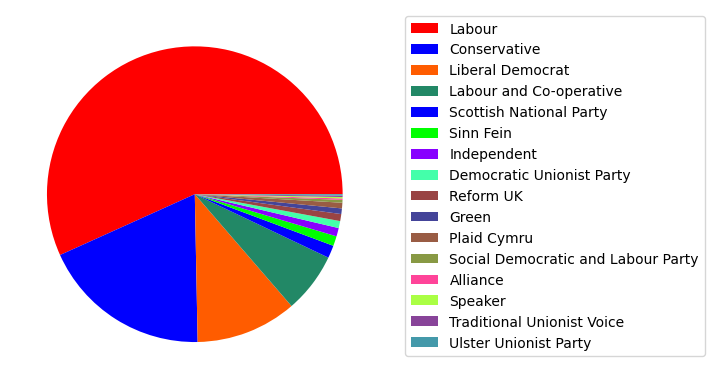

In [72]:

ax = by_party.plot.pie(labeldistance=None, subplots=True, colors=pcolors, ylabel='') 
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
